In [17]:
# Importamos las librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importamos el dataset
data = pd.read_csv('data.csv')

# Establecemos el ID_Vuelo como indice
data.set_index('ID_Vuelo', inplace=True)

### Planteamos el modelo de ML

In [18]:
# Establecemos la variable dependiente: 'bool' y la independiente: ('temperatura','cobertura_nubes')

y = data['bool']
X = data[['temperatura','cobertura_nubes']]

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

from sklearn.preprocessing import RobustScaler # StandardScaler para escalar los datos

sc_X = RobustScaler()
X_Train = sc_X.fit_transform(X_train)
X_Test = sc_X.transform(X_test)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=19, metric='euclidean', p=1)
# n_neighbors es el numero de vecinos mas cercanos que se van a tomar en cuenta
# metric es la distancia que se va a utilizar para calcular la distancia entre los puntos
# p es el exponente de la distancia que se va a utilizar para calcular la distancia entre los puntos

In [21]:
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=19, p=1)

In [22]:
y_pred = knn.predict(X_Test)

c:\Users\GIGABYTE\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [23]:
from sklearn.metrics import accuracy_score
print("La precisión del modelo es: ", accuracy_score(y_test,y_pred))

La precisión del modelo es:  0.30533671302322396


In [24]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('la matriz de confusión es: \n', matriz)

la matriz de confusión es: 
 [[1393 5944]
 [4196 3064]]


### Optimizando los hiperparámetros

In [9]:
param_grid = {'n_neighbors':np.arange(1, 20),
              'p':[1,2,3,5,8,13],
              'metric':['euclidean', 'manhattan', 'chebyshev', 'minkowski']}

In [10]:
knn = KNeighborsClassifier()

from sklearn.model_selection import GridSearchCV

model = GridSearchCV(knn, param_grid=param_grid, refit=True, cv=5, scoring='roc_auc')

model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'p': [1, 2, 3, 5, 8, 13]},
             scoring='roc_auc')

In [11]:
print("Mejores hiperparámetros: "+str(model.best_params_)+'\n')
print("Mejor Score: "+str(model.best_score_)+'\n')
print('El accuracy del modelo es: ', accuracy_score(y_test, model.predict(X_test)))

Mejores hiperparámetros: {'metric': 'euclidean', 'n_neighbors': 19, 'p': 1}

Mejor Score: 0.8417475723957037

El accuracy del modelo es:  0.7765979310817291


In [12]:
scores = pd.DataFrame(model.cv_results_)
scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.049636,0.008709,0.070848,0.002321,euclidean,1,1,"{'metric': 'euclidean', 'n_neighbors': 1, 'p': 1}",0.667487,0.692138,0.698059,0.665946,0.694827,0.683691,0.013995,433
1,0.045033,0.000635,0.069055,0.000636,euclidean,1,2,"{'metric': 'euclidean', 'n_neighbors': 1, 'p': 2}",0.667487,0.692138,0.698059,0.665946,0.694827,0.683691,0.013995,433
2,0.046231,0.000396,0.073054,0.006783,euclidean,1,3,"{'metric': 'euclidean', 'n_neighbors': 1, 'p': 3}",0.667487,0.692138,0.698059,0.665946,0.694827,0.683691,0.013995,433
3,0.046236,0.001937,0.073854,0.009650,euclidean,1,5,"{'metric': 'euclidean', 'n_neighbors': 1, 'p': 5}",0.667487,0.692138,0.698059,0.665946,0.694827,0.683691,0.013995,433
4,0.046834,0.003126,0.072051,0.002895,euclidean,1,8,"{'metric': 'euclidean', 'n_neighbors': 1, 'p': 8}",0.667487,0.692138,0.698059,0.665946,0.694827,0.683691,0.013995,433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,0.052837,0.000750,0.114683,0.001497,minkowski,19,2,"{'metric': 'minkowski', 'n_neighbors': 19, 'p'...",0.838580,0.844385,0.838747,0.840172,0.846854,0.841748,0.003303,1
452,0.052839,0.001166,0.277799,0.004931,minkowski,19,3,"{'metric': 'minkowski', 'n_neighbors': 19, 'p'...",0.838438,0.844301,0.838745,0.840238,0.846774,0.841699,0.003287,15
453,0.051441,0.000802,0.279396,0.008841,minkowski,19,5,"{'metric': 'minkowski', 'n_neighbors': 19, 'p'...",0.838427,0.844267,0.838693,0.840234,0.846766,0.841678,0.003291,16
454,0.063247,0.022927,0.277598,0.006288,minkowski,19,8,"{'metric': 'minkowski', 'n_neighbors': 19, 'p'...",0.838377,0.844273,0.838645,0.840230,0.846766,0.841658,0.003311,18


In [13]:
#Predecimos en los datos de test con el mejor modelo obtenido
prediction = model.predict(X_test)

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, prediction)

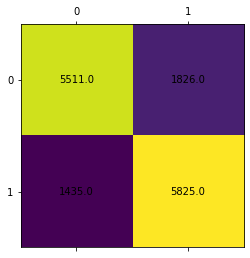

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(matrix)

fig, ax = plt.subplots(figsize=(4,5))
ax.matshow(matrix)
for (i, j), z in np.ndenumerate(matrix):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plt.show()

In [15]:
from sklearn.metrics import recall_score
print('Recall:', recall_score(y_test, prediction))

# Reporte de Clasificacion
from sklearn.metrics import classification_report
report = classification_report(y_test, prediction)
print("Reporte de Clasificación:")
print(report)

Recall: 0.8023415977961432
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      7337
           1       0.76      0.80      0.78      7260

    accuracy                           0.78     14597
   macro avg       0.78      0.78      0.78     14597
weighted avg       0.78      0.78      0.78     14597



In [16]:
from sklearn.metrics import roc_auc_score
print("El roc_auc_score es: ", roc_auc_score(y_test, prediction))

El roc_auc_score es:  0.7767330177886264
